In [1]:
import sys
sys.path.append('/home/martin/work/repos/pyfuncs')
from numpy import *
from astropy.io import fits
from matplotlib.pyplot import *
import corner
from sklearn import cluster
from plot_funcs import nice_plot_params

nice_plot_params()

with fits.open('/home/martin/work/Projects/CS20hackday/Praesepe.fits') as hdu:
    data = hdu[1].data


In [2]:
# Import
HDBmemprob = data['HDBscan_MemProb']
HDBcluster = data['HDBscan_Cluster']

idx = (HDBmemprob >= 0.1) * (HDBcluster == 1)

gaia_ra = data['gaia_dr2_source.ra'][idx]
gaia_dec = data['gaia_dr2_source.dec'][idx]

gaia_pmra = data['gaia_dr2_source.pmra'][idx]
gaia_pmdec = data['gaia_dr2_source.pmdec'][idx]

gaia_parallax = data['gaia_dr2_source.parallax'][idx]

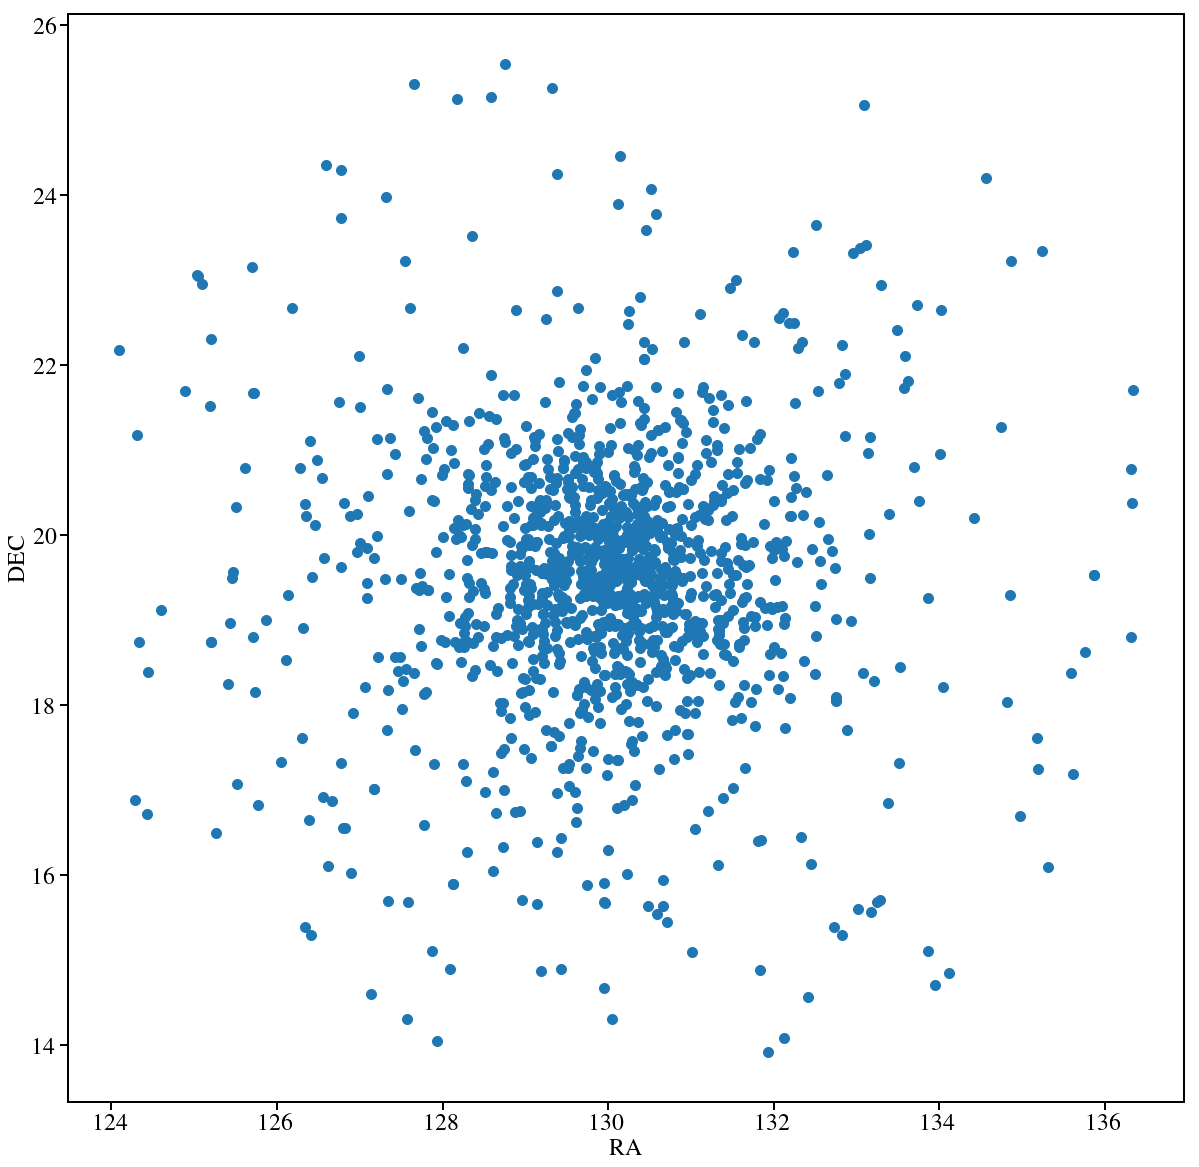

In [3]:
figure(figsize = (20,20))
plot(gaia_ra,gaia_dec,'.', ms = 20)
xlabel('RA')
ylabel('DEC')
show()

In [4]:
arr = vstack((gaia_ra,gaia_dec,gaia_parallax,gaia_pmra,gaia_pmdec)).T


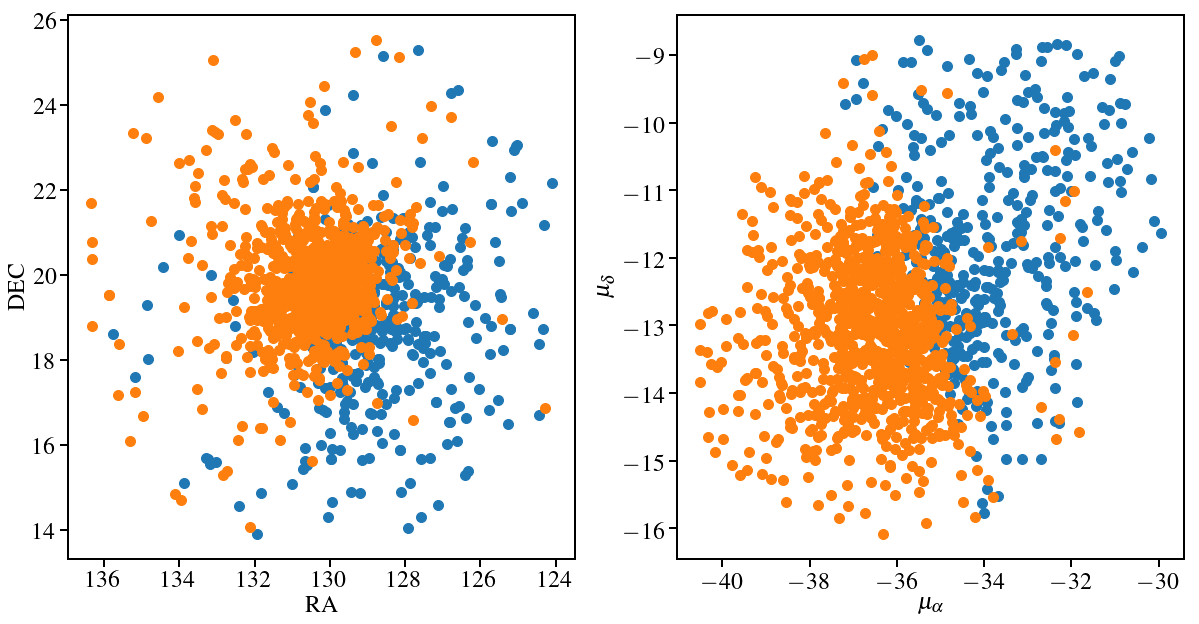

In [5]:
# Kmeans
kmeans = cluster.KMeans(n_clusters = 2)
kmeans.fit(arr)

figure(figsize = (20,10))
subplot(121)
xlabel('RA')
ylabel('DEC')
for i in range(max(kmeans.labels_)+1):
    idx = kmeans.labels_ == i
    plot(gaia_ra[idx],gaia_dec[idx],'.', ms = 20)
gca().invert_xaxis()

subplot(122)
xlabel(r'$\mu_{\alpha}$')
ylabel(r'$\mu_{\delta}$')
for i in range(max(kmeans.labels_)+1):
    idx = kmeans.labels_ == i
    plot(gaia_pmra[idx],gaia_pmdec[idx],'.', ms = 20)
show()

/home/martin/anaconda2/lib/python2.7/site-packages/scipy/sparse/csgraph/_laplacian.py:72: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if normed and (np.issubdtype(csgraph.dtype, int)


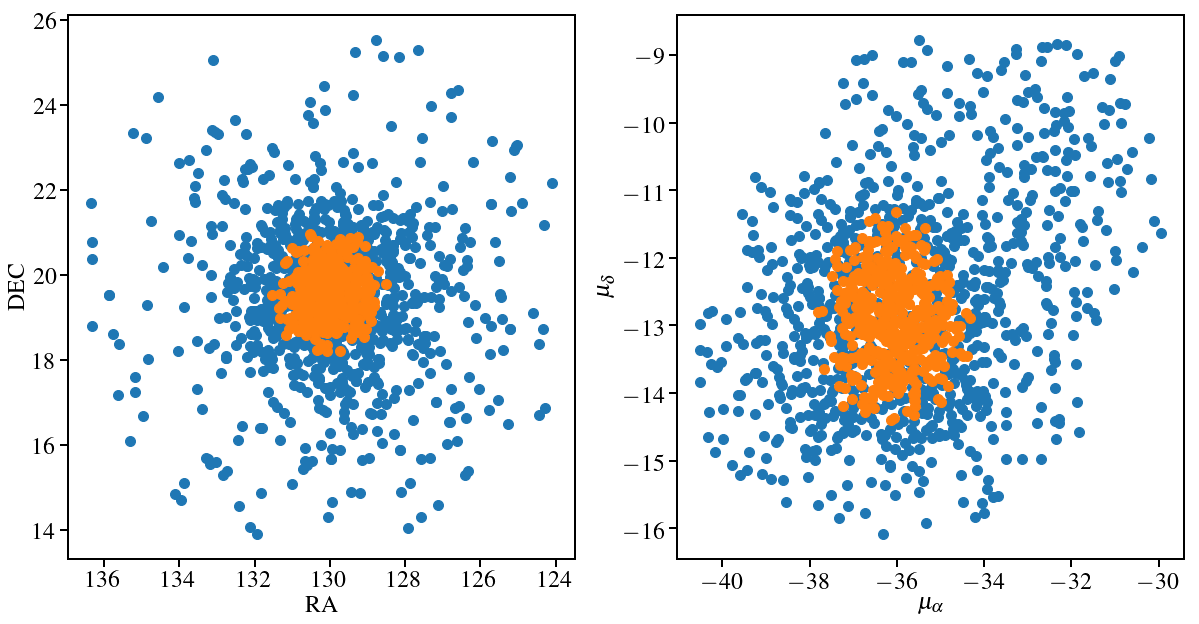

In [6]:
# SpectralCluster

specclust = cluster.SpectralClustering(n_clusters = 2)
specclust.fit(arr)

figure(figsize = (20,10))
subplot(121)
xlabel('RA')
ylabel('DEC')
for i in range(max(specclust.labels_)+1):
    idx = specclust.labels_ == i
    plot(gaia_ra[idx],gaia_dec[idx],'.', ms = 20)
gca().invert_xaxis()

subplot(122)
xlabel(r'$\mu_{\alpha}$')
ylabel(r'$\mu_{\delta}$')
for i in range(max(specclust.labels_)+1):
    idx = specclust.labels_ == i
    plot(gaia_pmra[idx],gaia_pmdec[idx],'.', ms = 20)
show()

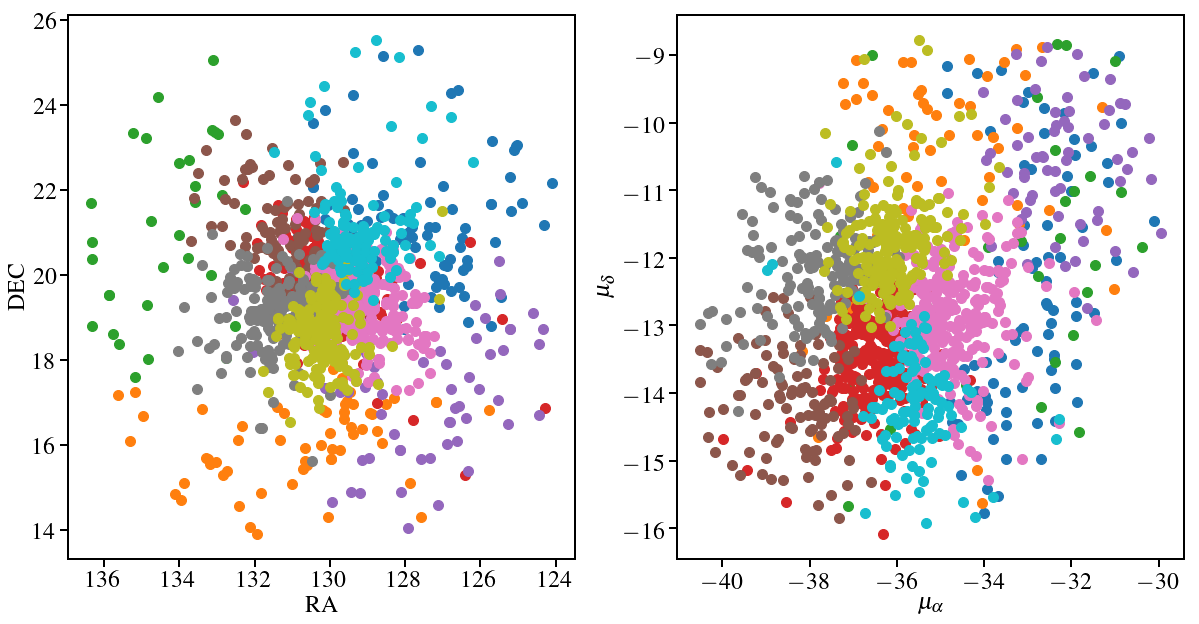

In [7]:
# AgglomerativeClustering

aggclust = cluster.AgglomerativeClustering(n_clusters = 10)
aggclust.fit(arr)

figure(figsize = (20,10))
subplot(121)
xlabel('RA')
ylabel('DEC')
for i in range(max(aggclust.labels_)+1):
    idx = aggclust.labels_ == i
    plot(gaia_ra[idx],gaia_dec[idx],'.', ms = 20)
gca().invert_xaxis()

subplot(122)
xlabel(r'$\mu_{\alpha}$')
ylabel(r'$\mu_{\delta}$')
for i in range(max(aggclust.labels_)+1):
    idx = aggclust.labels_ == i
    plot(gaia_pmra[idx],gaia_pmdec[idx],'.', ms = 20)

#fig0 = corner.corner(arr[ag0], range = [(124,136),(14,26),(3.5,6.5),(-41,-29),(-16,-9)])
#fig1 = corner.corner(arr[ag1], range = [(124,136),(14,26),(3.5,6.5),(-41,-29),(-16,-9)])
#]
show()

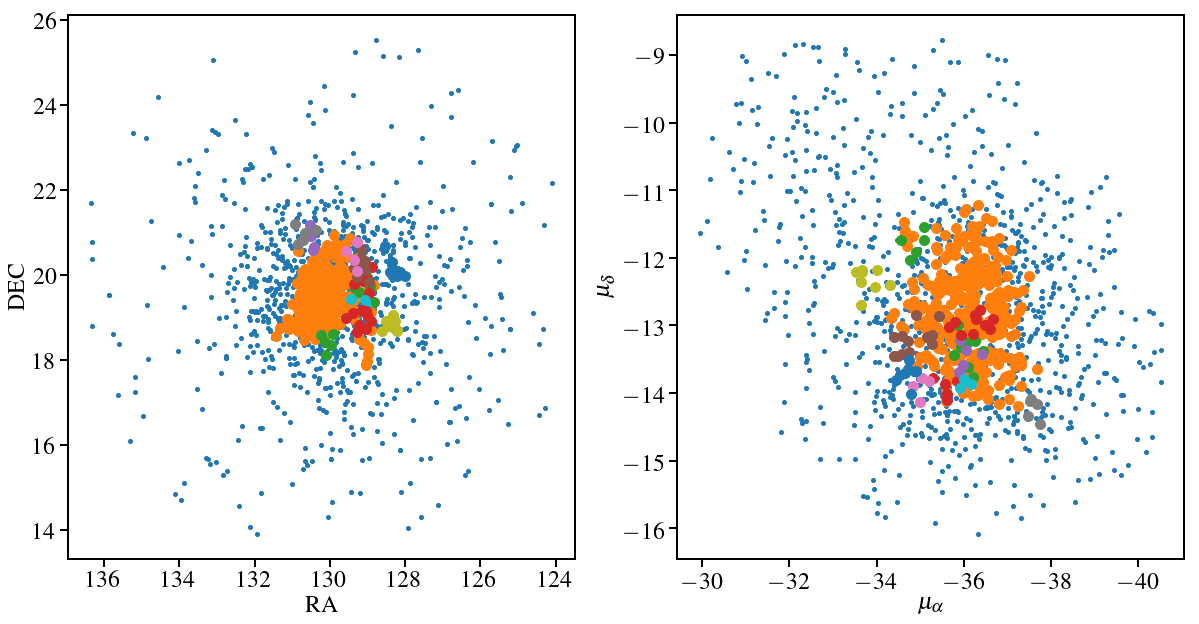

In [8]:
#DBSCAN

dbscan = cluster.DBSCAN()
dbscan.fit(arr)

figure(figsize = (20,10))
subplot(121)
plot(gaia_ra[dbscan.labels_ == -1],gaia_dec[dbscan.labels_ == -1],'.')
for i in range(max(dbscan.labels_)+1):
    idx = dbscan.labels_ == i
    plot(gaia_ra[idx],gaia_dec[idx],'.', ms = 20)
xlabel(r'RA')
ylabel(r'DEC')
gca().invert_xaxis()

subplot(122)
xlabel(r'$\mu_{\alpha}$')
ylabel(r'$\mu_{\delta}$')
plot(gaia_pmra[dbscan.labels_ == -1],gaia_pmdec[dbscan.labels_ == -1],'.')
for i in range(max(dbscan.labels_)+1):
    idx = dbscan.labels_ == i
    plot(gaia_pmra[idx],gaia_pmdec[idx],'.', ms = 20)
gca().invert_xaxis() 
show()
